# House Price Prediction – EDA and Model Notebook
This notebook performs step-wise Exploratory Data Analysis and trains a Random Forest model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Step 1: Load Dataset

In [2]:
csv_path = '../data/house_price.csv'
df = pd.read_csv(csv_path)
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (24619, 21)


,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,house_age,years_since_renovation
0,3,2.09,1824,12003,1.47,1,1,3,7,1737,...,122034,52.81,-114.41,2069,10472,1,66,674089,48,47
1,3,2.22,2117,14418,1.50,1,1,3,7,1864,...,122035,52.82,-114.43,2077,15632,2,65,987835,50,47
2,3,2.28,2174,16925,1.39,1,1,3,7,1704,...,122035,52.81,-114.39,1925,20823,2,65,1002214,49,46
3,3,2.30,1888,17310,1.51,1,1,3,7,1823,...,122027,52.79,-114.38,2095,19049,1,64,586038,52,56
4,3,2.36,2007,11629,1.31,1,1,3,7,1679,...,122037,52.81,-114.37,1848,9731,2,63,617861,53,53


## Step 2: Basic Data Overview

In [3]:
print('\nDataset Info:')
df.info()
print('\nStatistical Summary:')
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24619 entries, 0 to 24618
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     24619 non-null  int64  
 1   number of bathrooms                    24619 non-null  float64
 2   living area                            24619 non-null  int64  
 3   lot area                               24619 non-null  int64  
 4   number of floors                       24619 non-null  float64
 5   waterfront present                     24619 non-null  int64  
 6   number of views                        24619 non-null  int64  
 7   condition of the house                 24619 non-null  int64  
 8   grade of the house                     24619 non-null  int64  
 9   Area of the house(excluding basement)  24619 non-null  int64  
 10  Area of the basement                   24619 non-null  

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,house_age,years_since_renovation
count,24619.000000,24619.000000,24619.000000,2.461900e+04,24619.000000,24619.000000,24619.000000,24619.000000,24619.000000,24619.000000,...,24619.000000,24619.000000,24619.000000,24619.000000,24619.000000,24619.000000,24619.000000,2.461900e+04,24619.000000,24619.000000
mean,3.221658,2.129912,2096.949470,1.509241e+04,1.502663,0.410740,0.544458,3.255575,7.425484,1800.998050,...,122032.879077,52.792887,-114.404190,1996.980868,12728.867582,1.823429,64.743694,6.469377e+05,52.904261,50.293635
std,0.750319,0.598805,722.105979,2.948950e+04,0.420224,0.491978,0.700037,0.553643,0.967253,648.534862,...,14.846914,0.106985,0.109953,537.539391,20273.236854,0.741224,6.956233,3.335054e+05,22.943543,22.468888
min,1.000000,0.500000,370.000000,1.000000e+00,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,...,122003.000000,52.385900,-114.709000,460.000000,1.000000,1.000000,50.000000,7.800000e+04,9.000000,9.000000
25%,3.000000,1.930000,1750.000000,6.279000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1430.000000,...,122026.000000,52.760000,-114.471000,1714.500000,6343.500000,1.000000,62.000000,4.087500e+05,42.000000,39.000000
50%,3.000000,2.140000,2060.000000,9.886000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1751.000000,...,122032.000000,52.797700,-114.410000,1968.000000,9413.000000,2.000000,65.000000,5.858120e+05,52.000000,49.000000
75%,3.000000,2.500000,2289.500000,1.643350e+04,2.000000,1.000000,1.000000,3.000000,8.000000,1958.000000,...,122038.000000,52.849350,-114.370000,2139.000000,13719.500000,2.000000,68.000000,8.862850e+05,61.000000,57.000000
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06,124.000000,124.000000


## Step 3: Check Missing Values

In [4]:
missing = df.isnull().sum()
print(missing)
print('\nTotal Missing Values:', missing.sum())

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
house_age                                0
years_since_renovation                   0
dtype: int64

Total Missing Values: 0


## Step 4: Correlation Analysis

In [5]:
corr = df.corr()['Price'].sort_values(ascending=False)
corr

Price                                    1.000000
living area                              0.632401
Area of the house(excluding basement)    0.518241
living_area_renov                        0.493808
number of views                          0.493436
number of bathrooms                      0.447842
waterfront present                       0.418941
grade of the house                       0.415649
Area of the basement                     0.276767
Lattitude                                0.272948
number of floors                         0.221236
number of bedrooms                       0.152157
lot area                                 0.069433
lot_area_renov                           0.064860
Longitude                                0.019003
Distance from the airport               -0.010283
house_age                               -0.045905
years_since_renovation                  -0.093448
Postal Code                             -0.102435
Number of schools nearby                -0.111572


## Step 5: Visualizations – Price Distribution

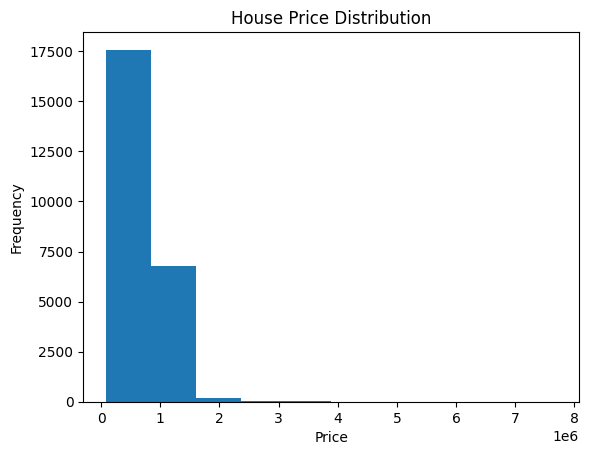

In [6]:
plt.figure()
plt.hist(df['Price'])
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Step 6: Living Area vs Price

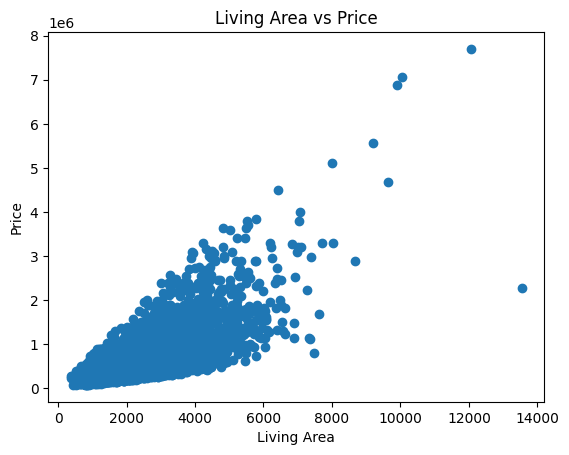

In [7]:
plt.figure()
plt.scatter(df['living area'], df['Price'])
plt.title('Living Area vs Price')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

## Step 7: Bedrooms vs Price

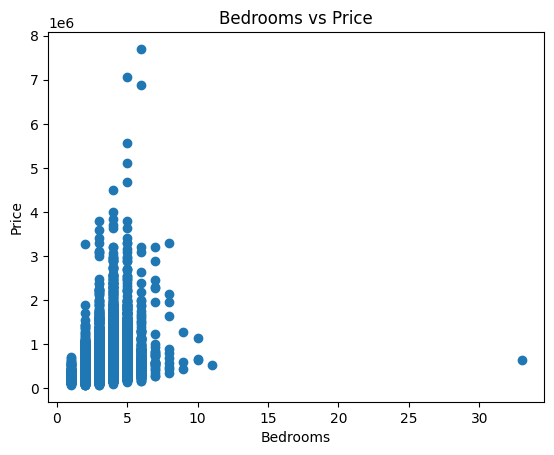

In [8]:
plt.figure()
plt.scatter(df['number of bedrooms'], df['Price'])
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

## Step 8: Practical Regression Accuracy Function

In [9]:
def compute_regression_accuracy(y_true, y_pred, tolerance=0.15):
    correct = np.sum((y_pred >= y_true*(1-tolerance)) & (y_pred <= y_true*(1+tolerance)))
    return correct/len(y_true)*100


## Step 9: Prepare Features and Target

In [10]:
X = df.drop(columns=['Price'])
y = df['Price']
print('Features Shape:', X.shape)
print('Target Shape:', y.shape)

Features Shape: (24619, 20)
Target Shape: (24619,)


## Step 10: Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train Shape:', X_train.shape)
print('Test Shape:', X_test.shape)

Train Shape: (19695, 20)
Test Shape: (4924, 20)


## Step 11: Model Training

In [12]:
model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=6,
                              min_samples_leaf=1, max_features=0.8, bootstrap=True,
                              random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print('Model Trained Successfully')

Model Trained Successfully


## Step 12: Model Evaluation

In [13]:
preds = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)) )
print('R2:', r2_score(y_test, preds))
acc = compute_regression_accuracy(y_test.values, preds)
print(f'Accuracy: {acc:.2f}%')

MAE: 44902.60153676117
RMSE: 99974.06464865225
R2: 0.9135610922095772
Accuracy: 82.15%


## Step 13: Feature Importance

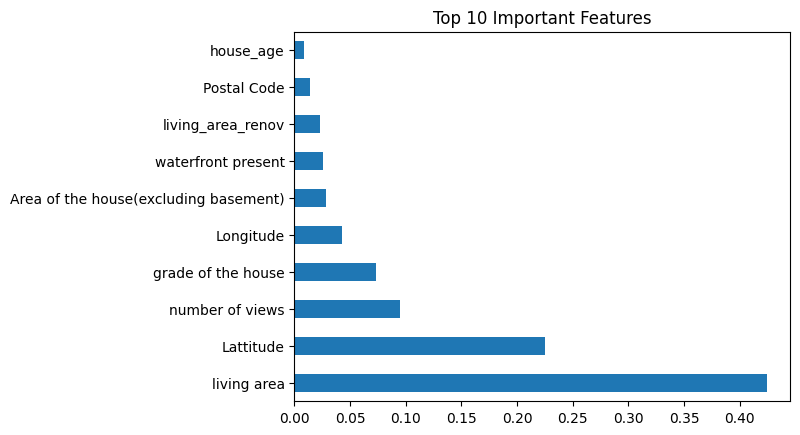

In [14]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()